In [1]:
import pandas as pd

In [2]:
import gseapy as gp

In [3]:
import networkx as nx

In [4]:
from itertools import chain, repeat

In [5]:
import math

1.	Realizar a análise de Enriquecimento usando o método GSEA:

In [24]:
ZIKV_POL_72hpi_vs_CTRL_72hpi = pd.read_csv('../data/raw/ZIKV_POL_72hpi_vs_CTRL_72hpi.tsv', sep='\t')
ZIKV_UGD_72hpi_vs_CTRL_72hpi = pd.read_csv('../data/raw/ZIKV_UGD_72hpi_vs_CTRL_72hpi.tsv', sep='\t')
ZIKV_POL_CTRL_72hpi_all_genes = pd.read_csv('../data/raw/ZIKV_POL_CTRL_72hpi_all_genes.tsv', sep='\t')

In [32]:
ZIKV_POL_72hpi_vs_CTRL_72hpi.rename(columns={"log2(fold change)": "log2FoldChange"}, inplace=True)
print(ZIKV_POL_72hpi_vs_CTRL_72hpi.shape)
ZIKV_POL_72hpi_vs_CTRL_72hpi.head()

(879, 3)


,ID,log2FoldChange,-log10(Pvalue)
0,A_19_P00315627,1.352,4.533
1,A_19_P00315647,1.600,3.886
2,A_19_P00315804,1.192,4.220
3,A_19_P00315914,0.576,3.196
4,A_19_P00317793,0.713,4.049


In [36]:
ZIKV_UGD_72hpi_vs_CTRL_72hpi.rename(columns={"log2(fold change)": "log2FoldChange"}, inplace=True)
print(ZIKV_UGD_72hpi_vs_CTRL_72hpi.shape)
ZIKV_UGD_72hpi_vs_CTRL_72hpi.head()

(18905, 3)


,ID,log2FoldChange,-log10(Pvalue)
0,(+)E1A_r60_1,0.901,3.889
1,(+)E1A_r60_a107,0.815,3.263
2,(+)E1A_r60_a135,1.010,3.449
3,(+)E1A_r60_a20,0.681,2.770
4,(+)E1A_r60_a22,0.974,3.528


In [35]:
ZIKV_POL_CTRL_72hpi_all_genes.rename(columns={"GENE_SYMBOL": "Gene_name"}, inplace=True)
print(ZIKV_POL_CTRL_72hpi_all_genes.shape)
ZIKV_POL_CTRL_72hpi_all_genes.head()

(50739, 6)


,ID,adj.P.Val,P.Value,F,Gene_name,GO_ID
0,A_33_P3343175,4.050000e-08,7.980000e-13,6310.0,CXCL10,GO:0002690(positive regulation of leukocyte ch...
1,A_23_P64828,9.880000e-08,5.610000e-12,3750.0,OAS1,GO:0000166(nucleotide binding)|GO:0001730(2'-5...
2,A_33_P3348872,9.880000e-08,5.840000e-12,3710.0,NaN,NaN
3,A_24_P303091,2.130000e-07,1.680000e-11,2800.0,CXCL10,GO:0002690(positive regulation of leukocyte ch...
4,A_23_P68155,3.300000e-07,3.250000e-11,2340.0,IFIH1,GO:0000166(nucleotide binding)|GO:0003677(DNA ...


In [37]:
ZIKV_POL_vs_CTRL_72hpi_genes = pd.merge(ZIKV_POL_72hpi_vs_CTRL_72hpi, ZIKV_POL_CTRL_72hpi_all_genes, on=["ID"])

In [54]:
down = ZIKV_POL_vs_CTRL_72hpi_genes[['Gene_name', 'log2FoldChange']]
down

,Gene_name,log2FoldChange
0,XLOC_l2_015098,1.352
1,LOC100507165,1.600
2,FLJ35024,1.192
3,XLOC_007868,0.576
4,LOC388796,0.713
...,...,...
874,JAK2,0.503
875,KCNT2,0.861
876,NaN,1.010
877,NaN,4.376


In [9]:
#down = pd.read_csv("Sup-Table-4-List_of_Down_regulated_Erosion_vs_Without-Erosion.csv")

In [10]:
#down.head()

,Ensembl.ID,Gene_name,log2FoldChange,padj
0,ENSG00000131845,ZNF304,-0.585086,0.029046
1,ENSG00000156502,SUPV3L1,-0.586085,0.001891
2,ENSG00000154781,CCDC174,-0.588956,0.008869
3,ENSG00000088038,CNOT3,-0.588963,0.036274
4,ENSG00000141367,CLTC,-0.590050,0.000862


In [41]:
# Podemos ver os "gene sets" que estão incluídos no gseapy. Alguns deles não estão atualizados
# Portanto, nesta tarefa vamos usar um arquivo gmt baixado do MSigDB (https://www.gsea-msigdb.org/gsea/msigdb/)
gp.get_library_name()[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021']

In [52]:
#down.iloc[:, 1:3]
#down.iloc[350:360,]

(833, 2)

In [56]:
down = down[~down['Gene_name'].isna()]
down

,Gene_name,log2FoldChange
0,XLOC_l2_015098,1.352
1,LOC100507165,1.600
2,FLJ35024,1.192
3,XLOC_007868,0.576
4,LOC388796,0.713
...,...,...
871,LOC338653,0.844
872,LOC338620,-0.490
873,DKFZp451B082,1.873
874,JAK2,0.503


In [13]:
# Executar a análise de enriquecimento
# O Enrichr usa o Fisher exact test
#del enrichr_down

In [57]:
enr = gp.enrichr(gene_list=down.Gene_name, gene_sets=['gene_sets_GOBP.gmt'], outdir=None) 

#enr = gp.enrichr(gene_list=down.Gene_name,gene_sets=['Reactome_2022', "h.all.v2023.2.Hs.symbols.gmt"], outdir=None) # Para usar a versão do mesmo arquivo gmt do gseapy.get_library_name()

#resultado da análise

enrichr_down = enr.results

enrichr_down.head()


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes
0,gene_sets_GOBP.gmt,GOBP_APICAL_PROTEIN_LOCALIZATION,1/15,0.433386,0.786515,2.682706,2.243082,NAPA
1,gene_sets_GOBP.gmt,GOBP_APOPTOTIC_CELL_CLEARANCE,2/48,0.537029,0.814757,1.392981,0.866021,TREX1;MARCO
2,gene_sets_GOBP.gmt,GOBP_APOPTOTIC_MITOCHONDRIAL_CHANGES,9/109,0.019615,0.131064,2.496833,9.816197,IFI6;PMAIP1;TNFSF10;HRK;AIFM2;IFIT2;HIP1R;BCL2...
3,gene_sets_GOBP.gmt,GOBP_APOPTOTIC_PROCESS,93/1965,0.003533,0.051931,1.451324,8.193719,GADD45B;UBD;UNG;ITGB2;IRF7;CEBPB;IFIT3;CSRNP1;...
4,gene_sets_GOBP.gmt,GOBP_APOPTOTIC_SIGNALING_PATHWAY,35/622,0.007995,0.097716,1.649364,7.964761,DDIT4;DDIT3;TNFSF10;PML;PPP1R15A;PMAIP1;CTH;CE...


In [58]:
enrichr_down.shape

(147, 8)

In [60]:
# somente os resultados estatisticamente significativos
enrichr_down = enrichr_down[enrichr_down["Adjusted P-value"]<0.05]

enrichr_down.reset_index(drop=True, inplace=True)
enrichr_down

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes
0,gene_sets_GOBP.gmt,GOBP_INTERFERON_ALPHA_PRODUCTION,6/30,6.922338e-04,0.014537,7.004393,50.961071,IRF7;TLR3;RIPK2;IFIH1;NMI;STAT1
1,gene_sets_GOBP.gmt,GOBP_POSITIVE_REGULATION_OF_LEUKOCYTE_CELL_CEL...,23/275,2.071916e-04,0.006170,2.543309,21.572008,HLA-E;IGF2;RIPK2;CCL5;IL23A;ITGB2;PRKCQ;XBP1;S...
2,gene_sets_GOBP.gmt,GOBP_POSITIVE_REGULATION_OF_LEUKOCYTE_MEDIATED...,16/152,1.510228e-04,0.006170,3.266198,28.736273,ITGB2;ULBP1;HLA-B;HLA-E;PMS2;HLA-A;RSAD2;TAP2;...
3,gene_sets_GOBP.gmt,GOBP_POSITIVE_REGULATION_OF_LEUKOCYTE_PROLIFER...,15/166,1.227453e-03,0.022554,2.747019,18.412760,BST2;HLA-E;HLA-A;PRKCQ;BCL6;IL15;IGF2;RIPK2;CC...
4,gene_sets_GOBP.gmt,GOBP_POSITIVE_REGULATION_OF_LYMPHOCYTE_ACTIVATION,26/330,2.098637e-04,0.006170,2.389295,20.235065,HLA-E;IGF2;RIPK2;CCL5;IL23A;PRKCQ;XBP1;SOCS1;B...
5,gene_sets_GOBP.gmt,GOBP_POSITIVE_REGULATION_OF_LYMPHOCYTE_MEDIATE...,14/129,2.839339e-04,0.006956,3.375408,27.566176,ULBP1;HLA-B;HLA-E;PMS2;HLA-A;RSAD2;TAP2;B2M;ZP...
6,gene_sets_GOBP.gmt,GOBP_POSITIVE_REGULATION_OF_RESPONSE_TO_BIOTIC...,37/373,2.851349e-08,0.000004,3.193575,55.481627,OASL;HLA-E;IRF1;IFI35;RIPK2;CCL5;TRIM56;COLEC1...
7,gene_sets_GOBP.gmt,GOBP_POSITIVE_REGULATION_OF_RESPONSE_TO_EXTERN...,46/623,3.595138e-06,0.000264,2.313767,29.005223,OASL;HLA-E;IRF1;IFI35;OPTN;RIPK2;CCL5;IL23A;TR...


In [62]:
enrichr_down.shape

(8, 8)

In [63]:
type(enrichr_down)

pandas.core.frame.DataFrame

In [64]:
pd.options.mode.chained_assignment = None # disable the warning
enrichr_down.replace('GOBP_', '', regex=True, inplace=True)
enrichr_down.replace('_', ' ', regex=True, inplace=True)
enrichr_down

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes
0,gene sets GOBP.gmt,INTERFERON ALPHA PRODUCTION,6/30,6.922338e-04,0.014537,7.004393,50.961071,IRF7;TLR3;RIPK2;IFIH1;NMI;STAT1
1,gene sets GOBP.gmt,POSITIVE REGULATION OF LEUKOCYTE CELL CELL ADH...,23/275,2.071916e-04,0.006170,2.543309,21.572008,HLA-E;IGF2;RIPK2;CCL5;IL23A;ITGB2;PRKCQ;XBP1;S...
2,gene sets GOBP.gmt,POSITIVE REGULATION OF LEUKOCYTE MEDIATED IMMU...,16/152,1.510228e-04,0.006170,3.266198,28.736273,ITGB2;ULBP1;HLA-B;HLA-E;PMS2;HLA-A;RSAD2;TAP2;...
3,gene sets GOBP.gmt,POSITIVE REGULATION OF LEUKOCYTE PROLIFERATION,15/166,1.227453e-03,0.022554,2.747019,18.412760,BST2;HLA-E;HLA-A;PRKCQ;BCL6;IL15;IGF2;RIPK2;CC...
4,gene sets GOBP.gmt,POSITIVE REGULATION OF LYMPHOCYTE ACTIVATION,26/330,2.098637e-04,0.006170,2.389295,20.235065,HLA-E;IGF2;RIPK2;CCL5;IL23A;PRKCQ;XBP1;SOCS1;B...
5,gene sets GOBP.gmt,POSITIVE REGULATION OF LYMPHOCYTE MEDIATED IMM...,14/129,2.839339e-04,0.006956,3.375408,27.566176,ULBP1;HLA-B;HLA-E;PMS2;HLA-A;RSAD2;TAP2;B2M;ZP...
6,gene sets GOBP.gmt,POSITIVE REGULATION OF RESPONSE TO BIOTIC STIM...,37/373,2.851349e-08,0.000004,3.193575,55.481627,OASL;HLA-E;IRF1;IFI35;RIPK2;CCL5;TRIM56;COLEC1...
7,gene sets GOBP.gmt,POSITIVE REGULATION OF RESPONSE TO EXTERNAL ST...,46/623,3.595138e-06,0.000264,2.313767,29.005223,OASL;HLA-E;IRF1;IFI35;OPTN;RIPK2;CCL5;IL23A;TR...


In [65]:
# A coluna Genes indica os genes associados com as vias
# Vamos passar essa informação para um DataFrame com duas colunas (uma via ==> um gene)

pathways = {}

In [66]:
for ind in enrichr_down.index:
    
    path = enrichr_down.iloc[ind, 1]
    genes = enrichr_down.loc[ind, "Genes"]

    genes = genes.strip().split(";")

    pathways[path] = genes

    #if len(genes) < 5:
        
        #break
    #else:
        #pathways[path] = genes

    df = pd.DataFrame.from_records(
        chain.from_iterable(zip(repeat(k), v) for k, v in pathways.items()),
        columns=["geneset", "genesymbol"],
    )    

In [67]:
df.head()

,geneset,genesymbol
0,INTERFERON ALPHA PRODUCTION,IRF7
1,INTERFERON ALPHA PRODUCTION,TLR3
2,INTERFERON ALPHA PRODUCTION,RIPK2
3,INTERFERON ALPHA PRODUCTION,IFIH1
4,INTERFERON ALPHA PRODUCTION,NMI


In [68]:
df.shape

(183, 2)

2. rede das vias enriquecidas

In [69]:
G = nx.Graph() # Crear um grafo non direcionado 

In [70]:
# adicionar nós
G.add_nodes_from(df['geneset'])

In [71]:
G.add_nodes_from(df['genesymbol'])

In [72]:
# Definir as arestas
edges = [(row['geneset'], row['genesymbol']) for index, row in df.iterrows()]

In [73]:
edges[:20]

[('INTERFERON ALPHA PRODUCTION', 'IRF7'),
 ('INTERFERON ALPHA PRODUCTION', 'TLR3'),
 ('INTERFERON ALPHA PRODUCTION', 'RIPK2'),
 ('INTERFERON ALPHA PRODUCTION', 'IFIH1'),
 ('INTERFERON ALPHA PRODUCTION', 'NMI'),
 ('INTERFERON ALPHA PRODUCTION', 'STAT1'),
 ('POSITIVE REGULATION OF LEUKOCYTE CELL CELL ADHESION', 'HLA-E'),
 ('POSITIVE REGULATION OF LEUKOCYTE CELL CELL ADHESION', 'IGF2'),
 ('POSITIVE REGULATION OF LEUKOCYTE CELL CELL ADHESION', 'RIPK2'),
 ('POSITIVE REGULATION OF LEUKOCYTE CELL CELL ADHESION', 'CCL5'),
 ('POSITIVE REGULATION OF LEUKOCYTE CELL CELL ADHESION', 'IL23A'),
 ('POSITIVE REGULATION OF LEUKOCYTE CELL CELL ADHESION', 'ITGB2'),
 ('POSITIVE REGULATION OF LEUKOCYTE CELL CELL ADHESION', 'PRKCQ'),
 ('POSITIVE REGULATION OF LEUKOCYTE CELL CELL ADHESION', 'XBP1'),
 ('POSITIVE REGULATION OF LEUKOCYTE CELL CELL ADHESION', 'SOCS1'),
 ('POSITIVE REGULATION OF LEUKOCYTE CELL CELL ADHESION', 'B2M'),
 ('POSITIVE REGULATION OF LEUKOCYTE CELL CELL ADHESION', 'CORO1A'),
 ('POSITIVE R

In [74]:
#adicionar as arestas
G.add_edges_from(edges)

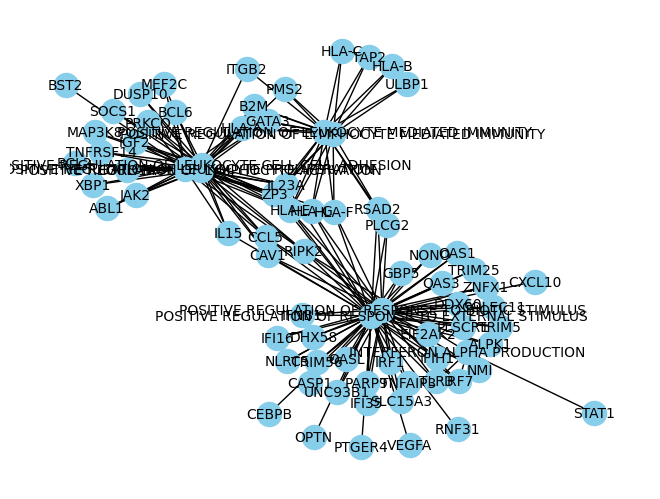

In [75]:
import matplotlib.pyplot as plt
# definir o layout
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_color='black')
# Mostrar o grafo
plt.show()

In [76]:
# Vamos exportar para melhor visualização no cytoscape

In [79]:
nx.write_gml(G, "../data/processed/ZIKV_POL_vs_CTRL_72hpi_genes.gml")